In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)


from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)



In [2]:
data = pd.read_csv("salary.csv")
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data.shape

(32561, 15)

### Observation
- The shape of the dataset is 32561 rows and 15 colunmns

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Observation
- There are 6 int columns and 9 object column

In [5]:
#copy the data to df
df = data.copy()

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,32561.0,NaN,NaN,NaN,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
workclass,32561,9,Private,22696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,32561.0,NaN,NaN,NaN,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education,32561,16,HS-grad,10501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education-num,32561.0,NaN,NaN,NaN,10.080679,2.57272,1.0,9.0,10.0,12.0,16.0
marital-status,32561,7,Married-civ-spouse,14976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,32561,15,Prof-specialty,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,32561,6,Husband,13193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,32561,5,White,27816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,32561,2,Male,21790,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Observation
- Capital-Gain and Capital-loss are highly skewed towrads the right. 

In [7]:
# checking for duplicate values
print("Before removing duplicates:", df.duplicated().sum())


#df = df[~df.duplicated()]

# removing duplicate values
#print("After removing duplicates:", df.duplicated().sum())

Before removing duplicates: 24


# EDA

### Univariate Analysis

In [8]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

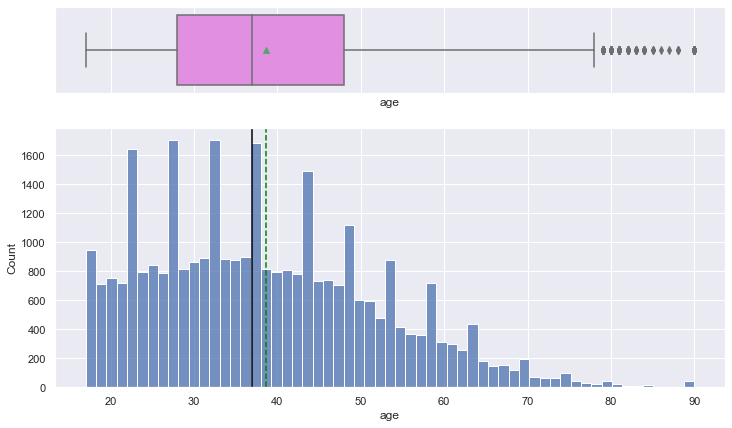

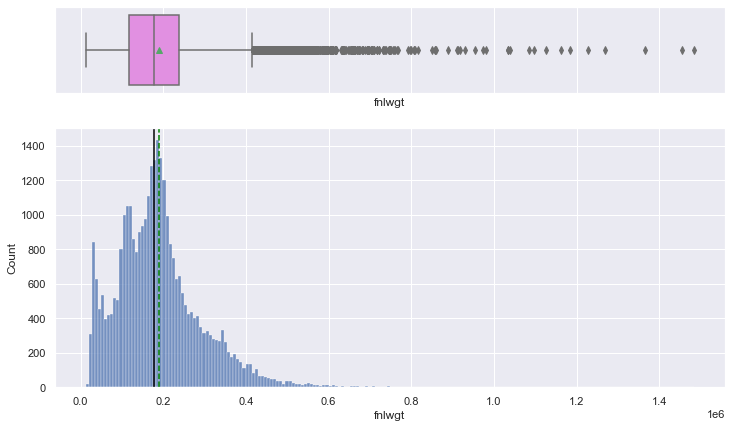

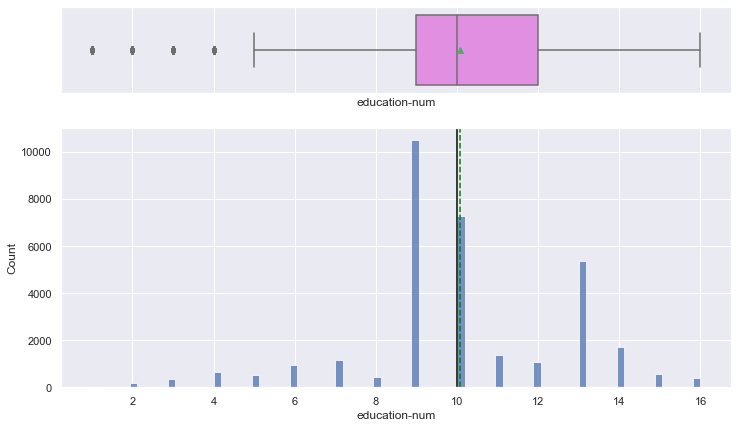

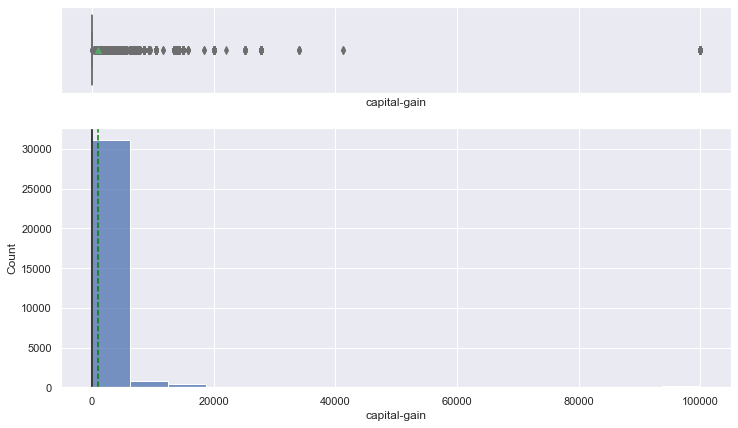

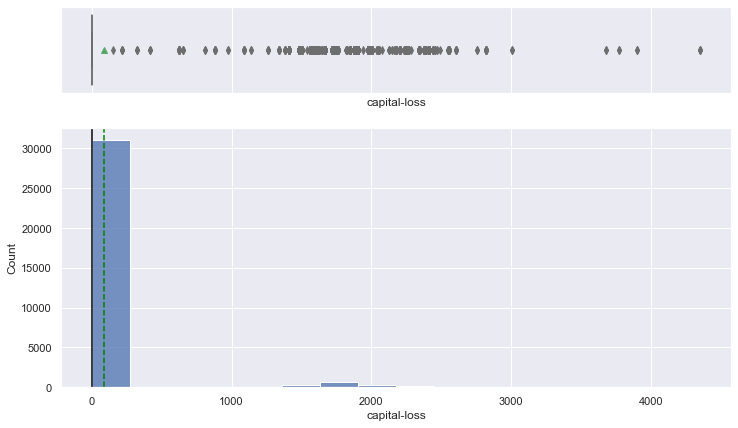

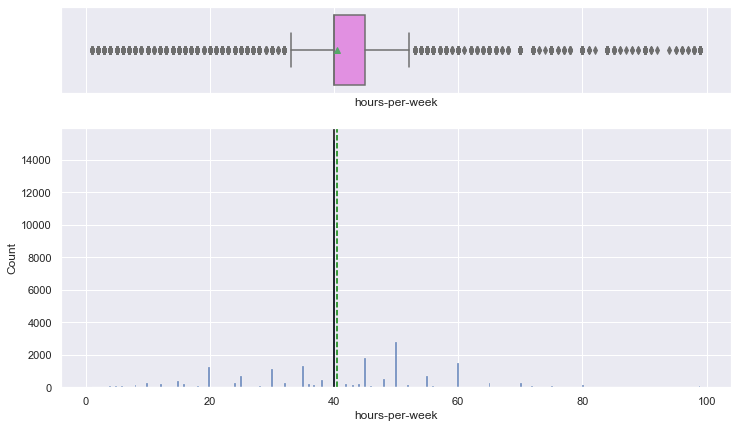

In [9]:
for feature in df.select_dtypes('number').columns:
    histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None)

### Observation
- Capital Gain and Capital Loss are right skewed.
- The mean and median is pretty close to each for Age, Education-num, Fnlwgt and Hours-per-week

### Bivariate Analysis

In [10]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

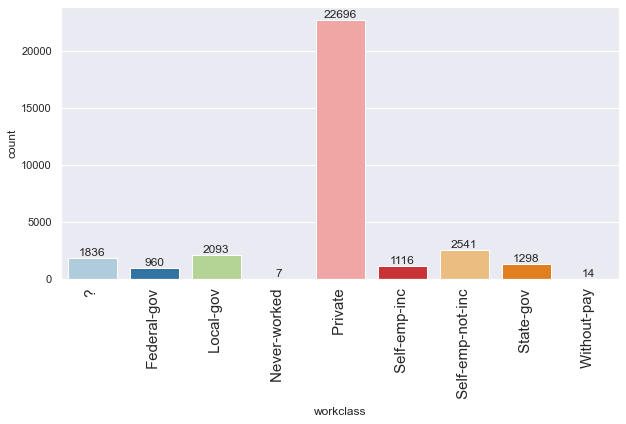

In [11]:
labeled_barplot(df, 'workclass')

### Observation
- Private workclass is the highest with almost 23K.
- Self-Emp-not-inc is second with only 2541.
- Third is "?" which is unkown with almost 1.9K
- We need to get to rid of "?" as it adds no value to the dataset.

In [12]:
# remove "?" using the drop() function
df.drop(df.index[df['workclass'] == ' ?'], inplace=True)

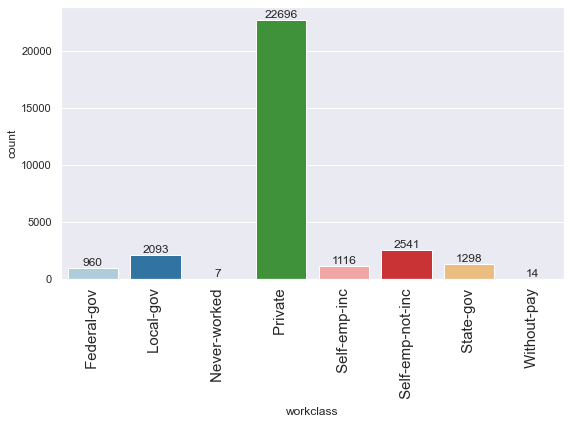

In [13]:
labeled_barplot(df, 'workclass')

### Observation
- The unknown "?" has been dropped successfully. 

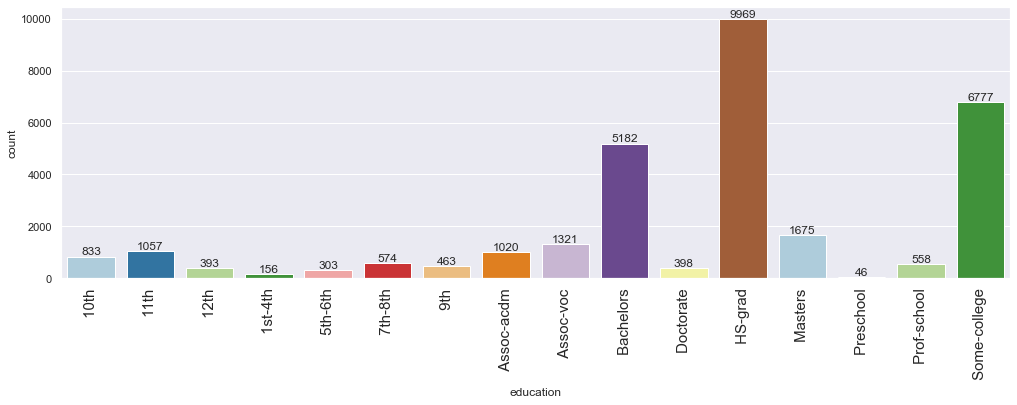

In [14]:
labeled_barplot(df, 'education')

### Observation 
- HS-grad is the highest with almost 10K followed by Some-college and Bachelors.

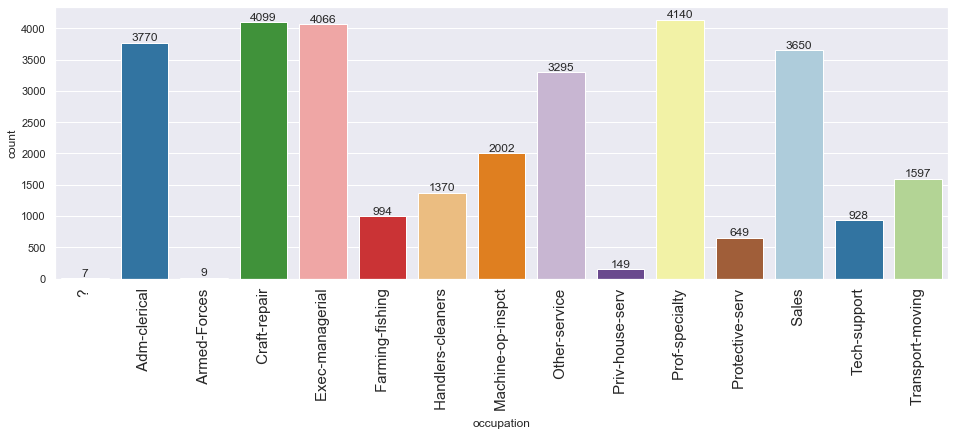

In [15]:
labeled_barplot(df, 'occupation')

### Observation
- Prof-speciality is the highest with 4140 closely followed by Craft-repair with 4099.
- It also contains a unknown value "?" 
- We need to get rid of the unknown value again.

In [16]:
# remove "?"" using the drop() function
df.drop(df.index[df['occupation'] == ' ?'], inplace=True)

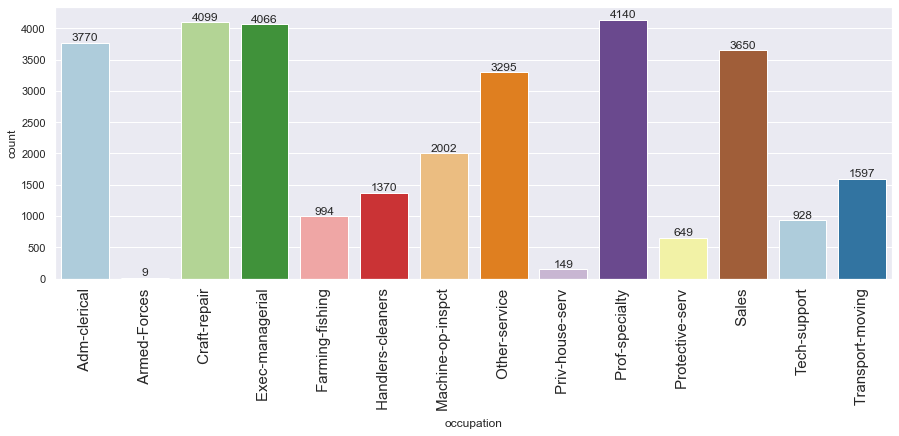

In [17]:
labeled_barplot(df, 'occupation')

### Observation
- The unknown "?" has been removed successfully.

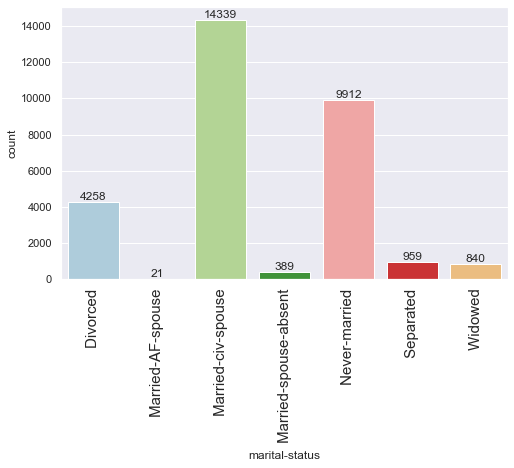

In [18]:
labeled_barplot(df, 'marital-status')

### Observation
- Married-civ-spouse is the highest with 14K
- Married-AF-spouse is the lowestr with only 21.

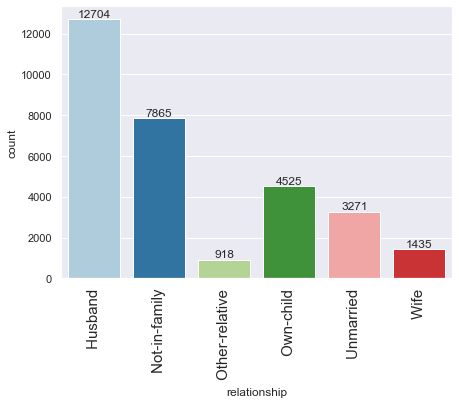

In [19]:
labeled_barplot(df, 'relationship')

### Observation
- Husband is the highest with 12K
- Other-Relative is the lowest with only 918.

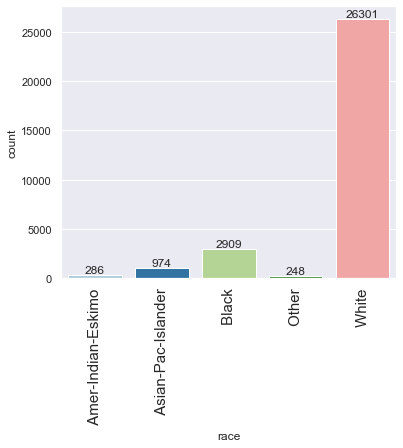

In [20]:
labeled_barplot(df, 'race')

### Observation
- White is the highest with 26K
- Black is the second highest with only 2909
- Other is the lowest with only 248

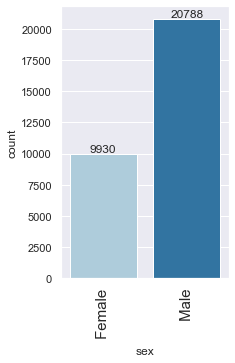

In [21]:
labeled_barplot(df, 'sex')

### Observation
- Male is the highest with almost 21K

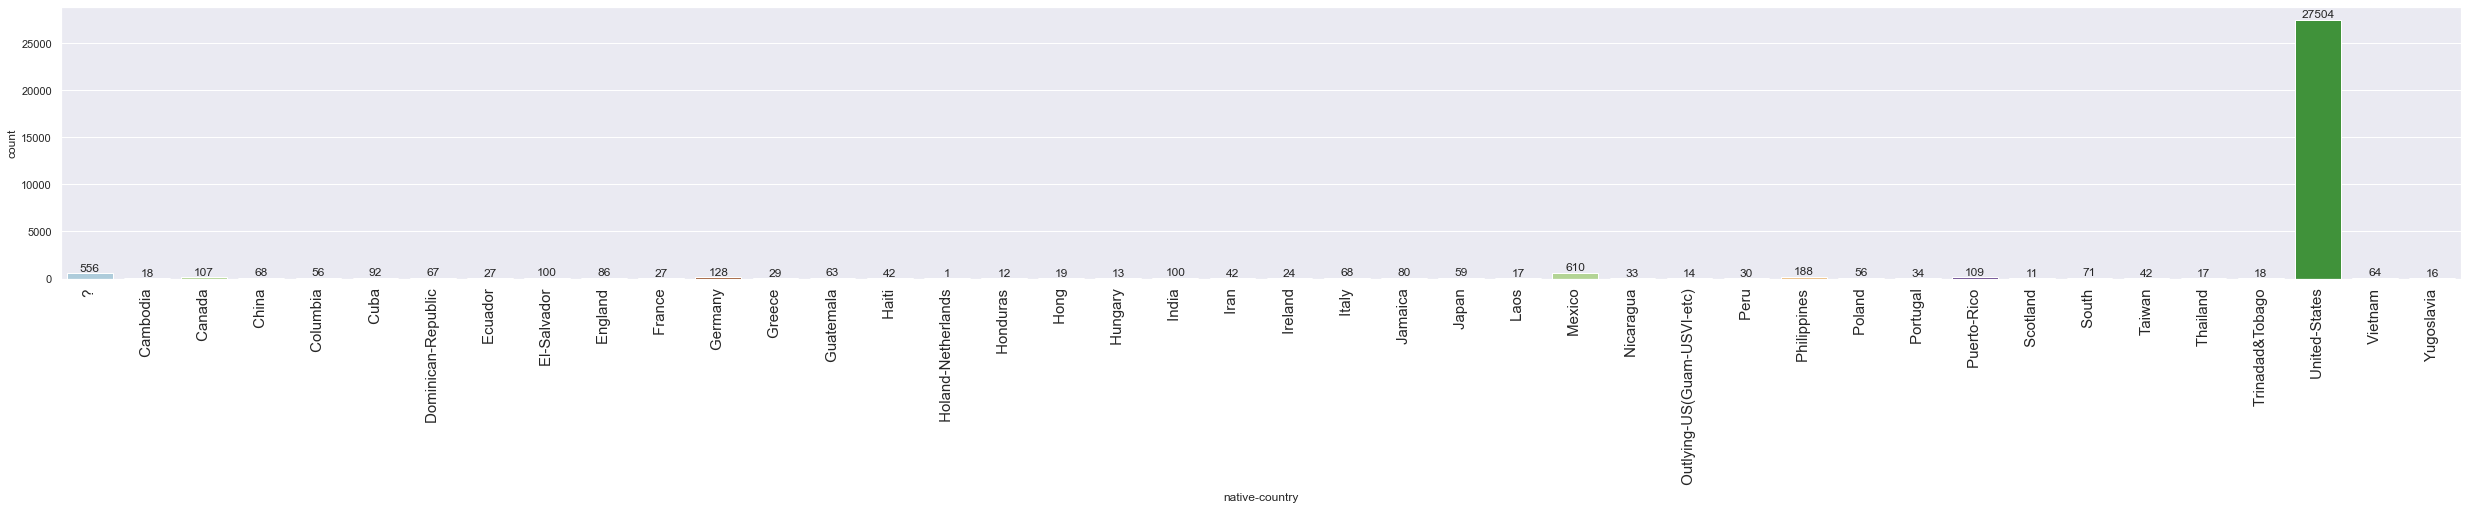

In [22]:
labeled_barplot(df, 'native-country')

### Observation
- USA is the highest native-country
- Holand-Nederlands is the lowest with only 1.
- Native-country also contains unknown value "?"
- We need to get rid of the unknown value "?"

In [23]:
# remove rows using the drop() function
df.drop(df.index[df['native-country'] == ' ?'], inplace=True)

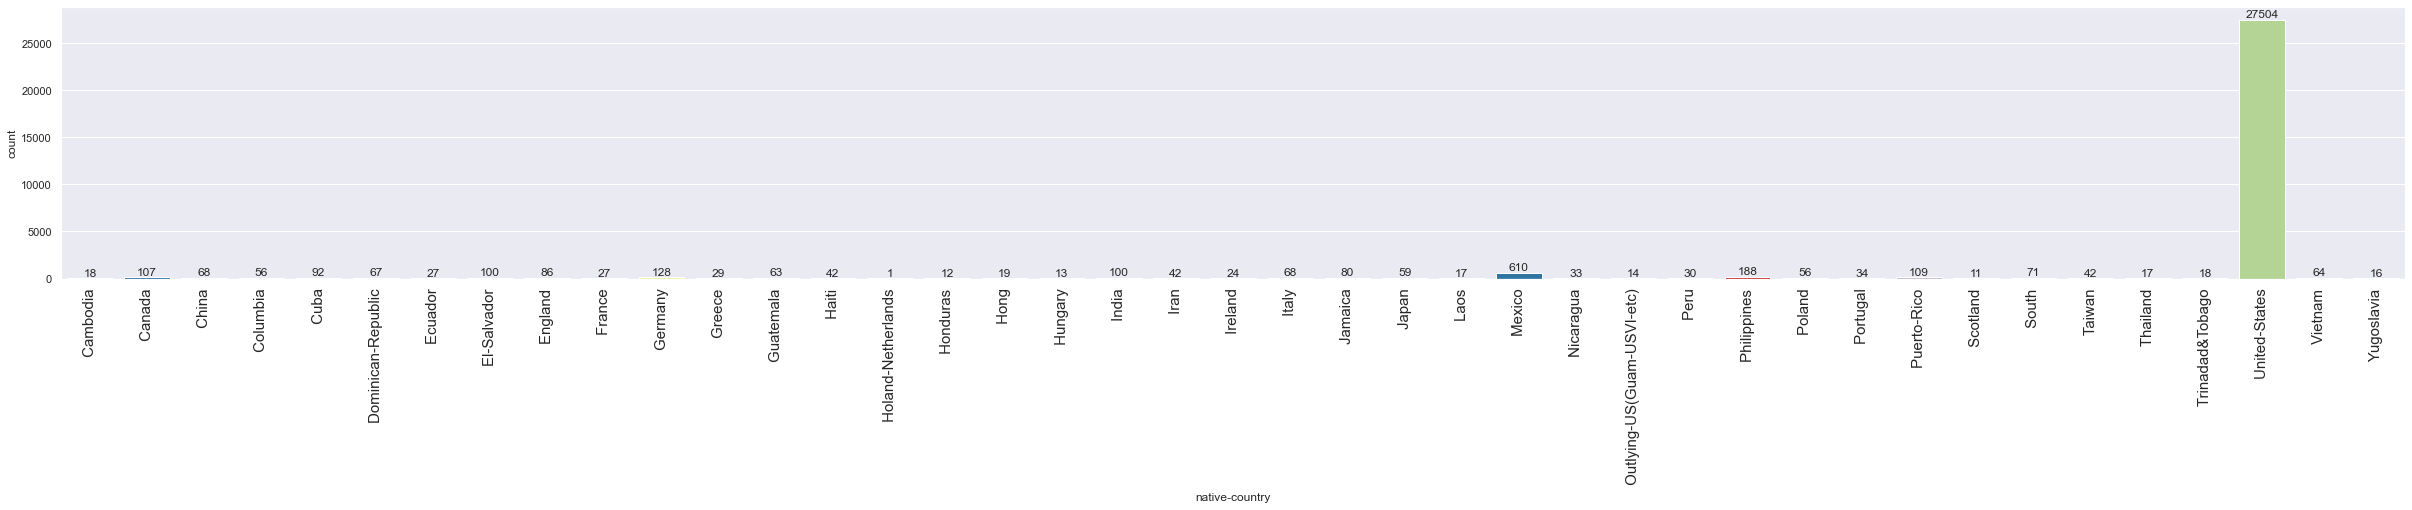

In [24]:
labeled_barplot(df, 'native-country')

### Observation
- The unknown value "?" has been dropped

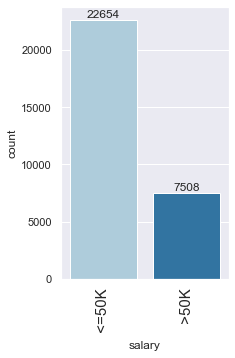

In [25]:
labeled_barplot(df, 'salary')

In [26]:
cor= df.corr()
cor

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076511,0.043526,0.080154,0.060165,0.101599
fnlwgt,-0.076511,1.000000,-0.044992,0.000422,-0.009750,-0.022886
education-num,0.043526,-0.044992,1.000000,0.124416,0.079646,0.152522
capital-gain,0.080154,0.000422,0.124416,1.000000,-0.032229,0.080432
capital-loss,0.060165,-0.009750,0.079646,-0.032229,1.000000,0.052417
hours-per-week,0.101599,-0.022886,0.152522,0.080432,0.052417,1.000000


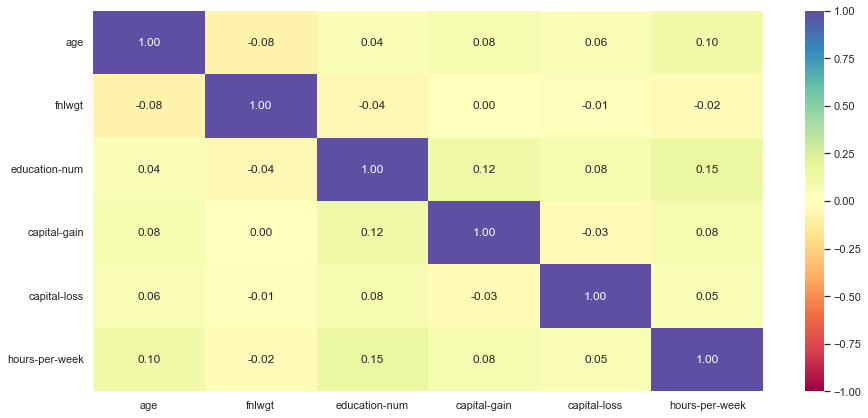

In [27]:
# plot the heatmap

plt.figure(figsize=(15, 7))
sns.heatmap(cor, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral", xticklabels=cor.columns, yticklabels=cor.columns)
plt.show()

### Observation
- Fnlwgt is highly negatively correlated to everything. Which is why we would drop this column.

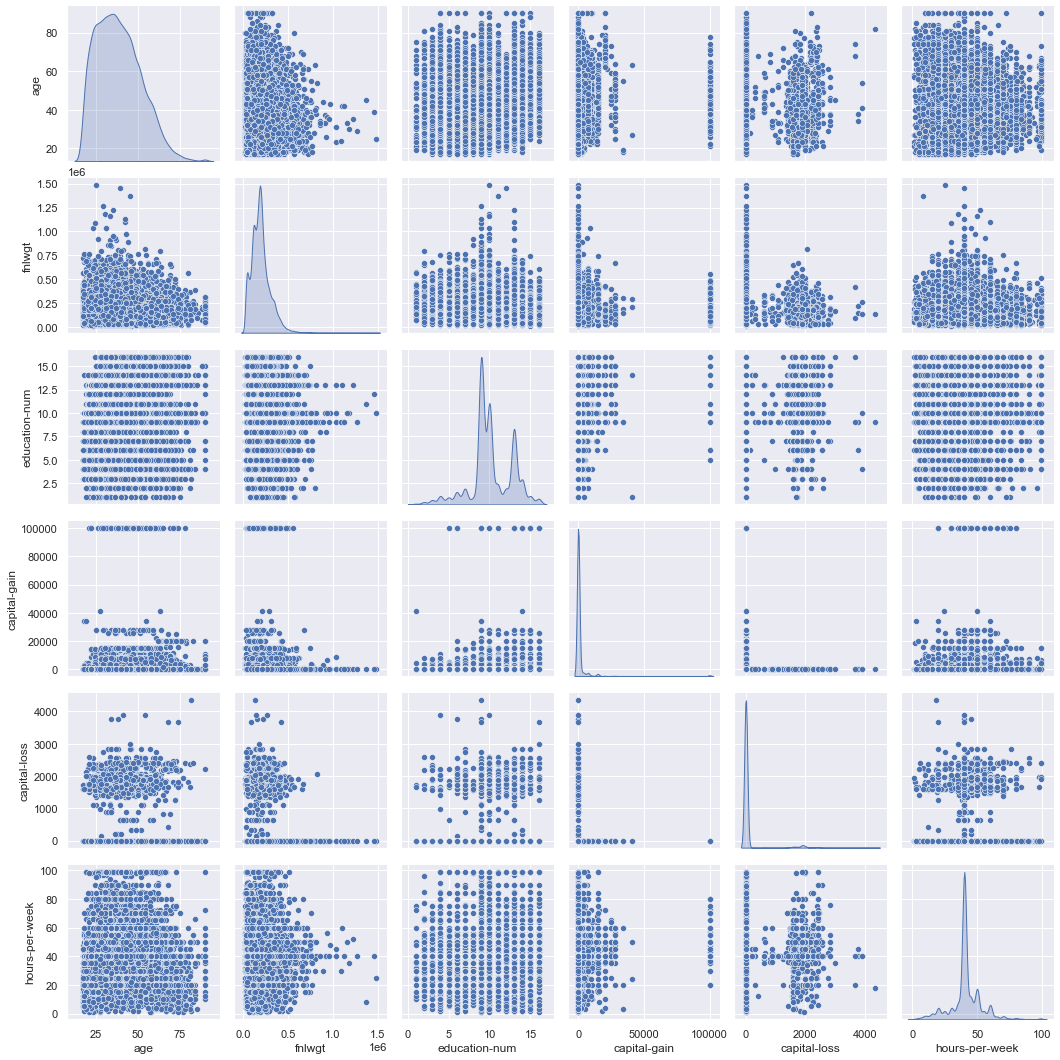

In [28]:
sns.pairplot(data=df, diag_kind="kde")
plt.show()

In [29]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

salary          <=50K   >50K    All
education-num                      
All             22654   7508  30162
13               2918   2126   5044
9                8223   1617   9840
10               5342   1336   6678
14                709    918   1627
15                136    406    542
11                963    344   1307
16                 95    280    375
12                752    256   1008
6                 761     59    820
7                 989     59   1048
4                 522     35    557
8                 348     29    377
5                 430     25    455
3                 276     12    288
2                 145      6    151
1                  45      0     45
------------------------------------------------------------------------------------------------------------------------


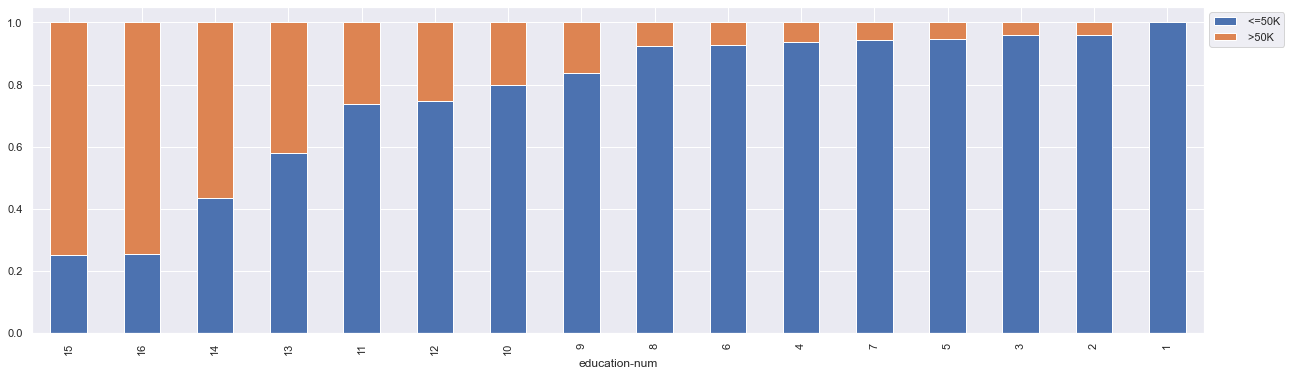

In [30]:
stacked_barplot(df, "education-num", "salary")

salary          <=50K   >50K    All
education                          
All             22654   7508  30162
 Bachelors       2918   2126   5044
 HS-grad         8223   1617   9840
 Some-college    5342   1336   6678
 Masters          709    918   1627
 Prof-school      136    406    542
 Assoc-voc        963    344   1307
 Doctorate         95    280    375
 Assoc-acdm       752    256   1008
 11th             989     59   1048
 10th             761     59    820
 7th-8th          522     35    557
 12th             348     29    377
 9th              430     25    455
 5th-6th          276     12    288
 1st-4th          145      6    151
 Preschool         45      0     45
------------------------------------------------------------------------------------------------------------------------


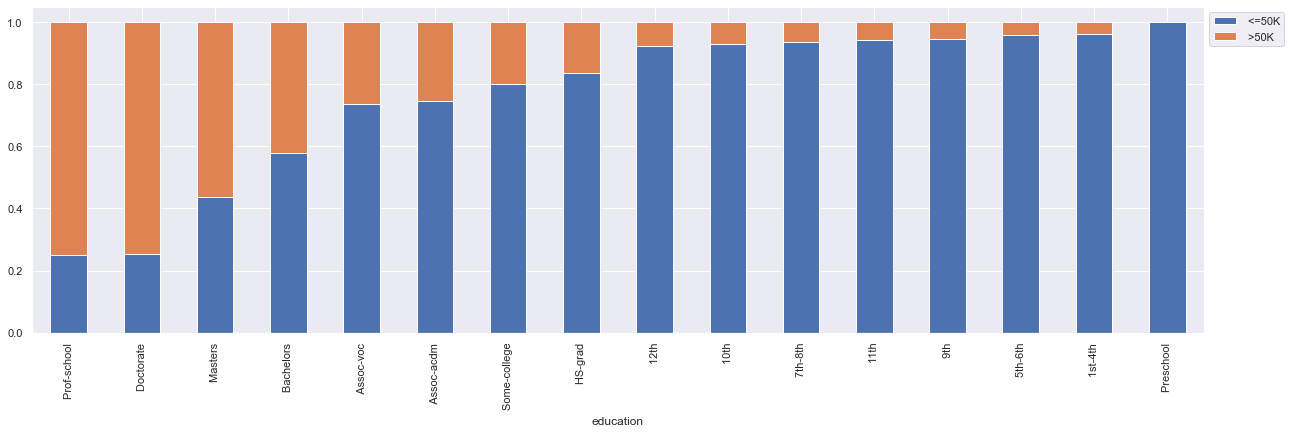

In [31]:
stacked_barplot(df, "education", "salary")

### Observation
- From the two stacked-bar graphs for education and education-num. We can clearly see a similarity between the two. They both are related to each other which is why we will delete Education from the data.

# Data-Preprocessing

### Missing value treatment

In [32]:
# checking the number of missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

### Observation
- There are no missing values in the dataset.

### Outliers

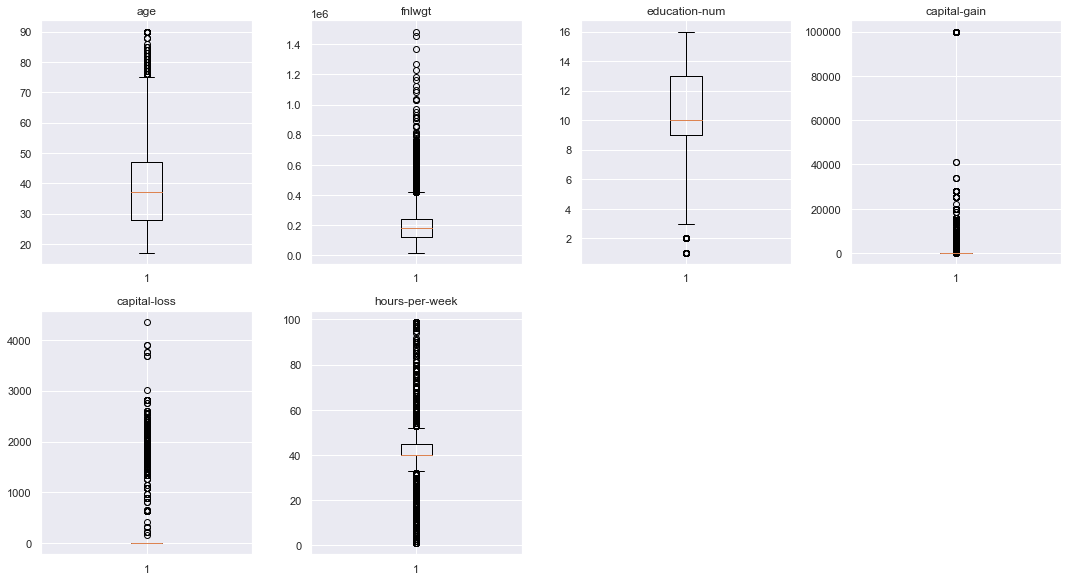

In [33]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Observation
- The data contains a lot of outliers but we will not treat the outliers as these value are important to the data.

# Model Building 

In [34]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1
            
        },
        index=[0],
    )

    return df_perf

In [35]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [36]:
df["salary"] = df["salary"].apply(lambda x: 1 if x == ' <=50K' else 0)

X = df.drop(["salary",'fnlwgt','education'], axis=1)
Y = df["salary"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)

In [37]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (21113, 80)
Shape of test set :  (9049, 80)
Percentage of classes in training set:
1    0.751054
0    0.248946
Name: salary, dtype: float64
Percentage of classes in test set:
1    0.751133
0    0.248867
Name: salary, dtype: float64


# Decision Trees

In [38]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

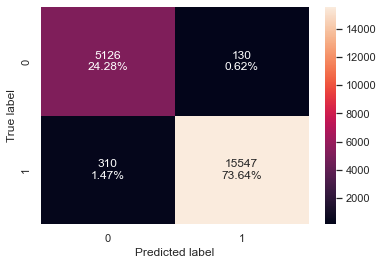

In [39]:
confusion_matrix_sklearn(model, X_train, y_train)


In [40]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.97916,0.98045,0.991708,0.986047


### Observation
- Accuracy of almost 98%.
- DTs are overfitting the training dataset a lot. 


### Testing

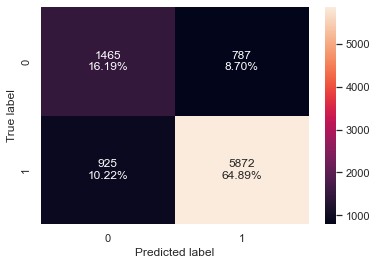

In [41]:
confusion_matrix_sklearn(model, X_test, y_test)


In [42]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.810808,0.863911,0.881814,0.872771


### Observation 
- The accuracy has decreased to just 81% on the testing dataset.
- Lets try to tune the model now and see how it affects the dataset.

### Hyper-parameter tuning

In [43]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(10, 30, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 3, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, n_jobs=-1)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_leaf_nodes=3,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

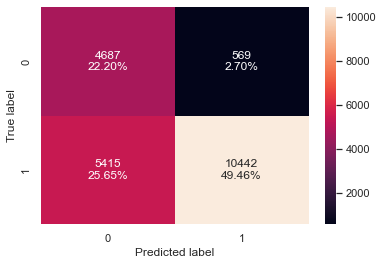

In [44]:
confusion_matrix_sklearn(dtree_estimator, X_train, y_train)


In [45]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(
    dtree_estimator, X_train, y_train
)
dtree_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.716573,0.65851,0.948324,0.777282


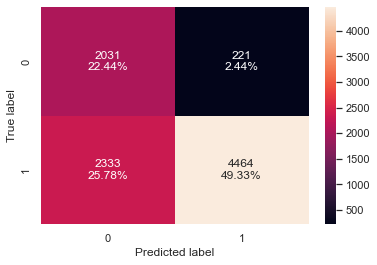

In [46]:
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

In [47]:
dtree_estimator_model_test_perf = model_performance_classification_sklearn(
    dtree_estimator, X_test, y_test
)
dtree_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.717759,0.65676,0.952828,0.777565


### Observation
- As you can see the accuracy decreases for both testing and training dataset after tuning which means that our initial model is pretty good.

# Random Forest

In [48]:
# Fitting the model
rf_estimator = RandomForestClassifier(random_state=1, class_weight="balanced")
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

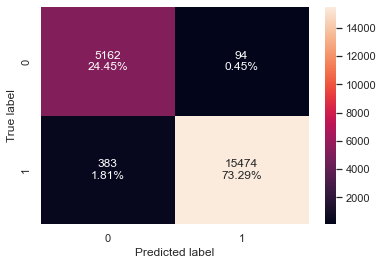

In [49]:
confusion_matrix_sklearn(rf_estimator, X_train, y_train)

In [50]:
# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, y_train
)
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.977407,0.975847,0.993962,0.984821


### Observation
- The training data seems to be overfitting

### Testing

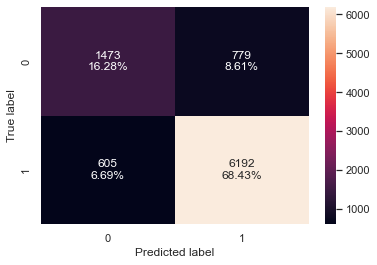

In [51]:
confusion_matrix_sklearn(rf_estimator, X_test, y_test)


In [52]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, y_test
)
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.847055,0.91099,0.888251,0.899477


### Observation
- We get a decent accuracy of 84% on the testing dataset.
- Lets tune it and see how the scores vary.

### Hyperparameter Tuning

In [53]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [3, 5, 7],
    "n_estimators": np.arange(10, 40, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=5,
                       n_estimators=30, oob_score=True, random_state=1)

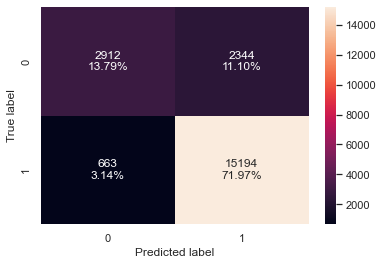

In [54]:
confusion_matrix_sklearn(rf_tuned, X_train, y_train)


In [55]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(
    rf_tuned, X_train, y_train
)
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.857576,0.958189,0.866347,0.909957


### Observation
- The training dataset seems to perform really well and doesnt seem to overfit the data.

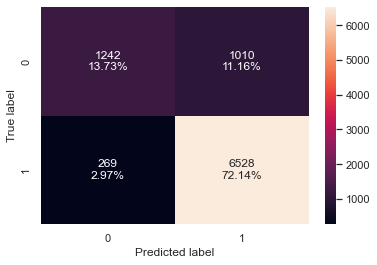

In [56]:
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

In [57]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(
    rf_tuned, X_test, y_test
)
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.858658,0.960424,0.866012,0.910778


### Observation
- The testing data performs similar to the training dataset after tuning.
- After tuning the testing data performs slightly better than the normal model.
- Our recall is pretty good with 96%.

# Bagging Classifier

In [58]:
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(random_state=1)

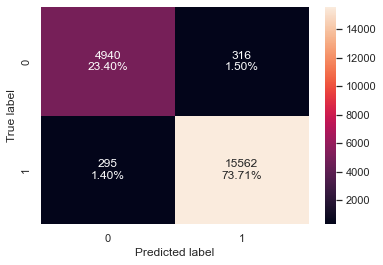

In [59]:
confusion_matrix_sklearn(bagging_classifier, X_train, y_train)

In [60]:
bagging_classifier_model_train_perf = model_performance_classification_sklearn(
    bagging_classifier, X_train, y_train
)
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.97106,0.981396,0.980098,0.980747


### Observation
- Bagging classifier also seems to overfit the training dataset

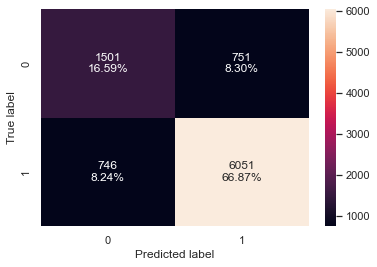

In [61]:
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)


In [62]:
bagging_classifier_model_test_perf = model_performance_classification_sklearn(
    bagging_classifier, X_test, y_test
)
bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.834567,0.890246,0.889591,0.889918


### Observation
- The model seems to be doing good on the testing data.
- Lets tune this model and see what happens

### Hyperparameter tuning

In [63]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.8, 0.9],
    "max_features": [0.7, 0.8, 0.9],
    "n_estimators": np.arange(90, 120, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.9, n_estimators=100,
                  random_state=1)

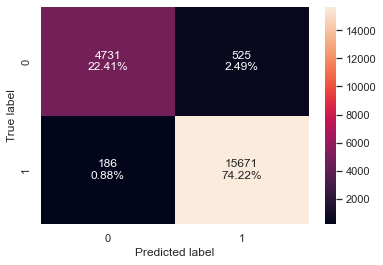

In [64]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train)


In [65]:
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_train, y_train
)
bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.966324,0.98827,0.967585,0.977818


### Observation
- The training data seems to overfit after tuning as well.

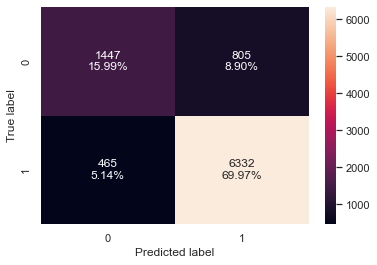

In [66]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

In [67]:
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_test, y_test
)
bagging_estimator_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.859653,0.931587,0.887208,0.908856


### Observation
- The accuracy is on testing data is 86% which is fairly decent.
- The recall is 93% which is pretty good.

# Gradient Boosting

In [68]:
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

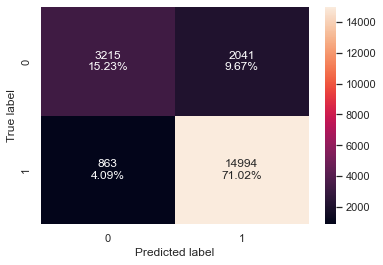

In [69]:
confusion_matrix_sklearn(gb_classifier, X_train, y_train)


In [70]:
gb_classifier_model_train_perf = model_performance_classification_sklearn(
    gb_classifier, X_train, y_train
)
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.862454,0.945576,0.880188,0.911711


### Observation
- The model doesnt seem to be affected by overfitting.
- We get a decent accuracy of 86% on the training data.

### Testing

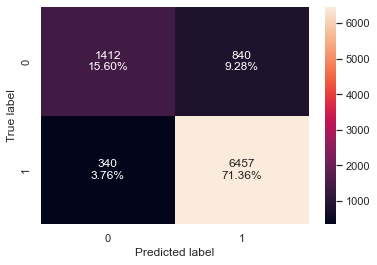

In [71]:
confusion_matrix_sklearn(gb_classifier, X_test, y_test)


In [72]:
gb_classifier_model_test_perf = model_performance_classification_sklearn(
    gb_classifier, X_test, y_test
)
gb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.869599,0.949978,0.884884,0.916276


### Observation
- The testing data performs pretty similar to the training dataset.
- Lets try to tune this model and see the scores

### Hyper-parameter Tuning

In [77]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250, 300],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=300, random_state=1,
                           subsample=1)

In [73]:
gbc_tuned=GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=300, random_state=1,
                           subsample=1)
gbc_tuned.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=300, random_state=1,
                           subsample=1)

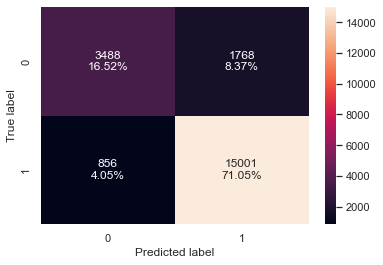

In [74]:
confusion_matrix_sklearn(gbc_tuned, X_train, y_train)


In [75]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(
    gbc_tuned, X_train, y_train
)
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.875716,0.946018,0.894567,0.919573


### Observation
- The accuracy increases after tuning the model but the recall stays pretty much the same.

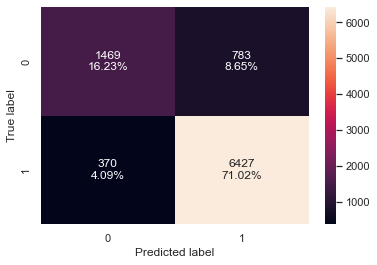

In [76]:
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

In [77]:
gbc_tuned_model_test_perf = model_performance_classification_sklearn(
    gbc_tuned, X_test, y_test
)
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.872583,0.945564,0.891401,0.917684


### Observation
- Even after tuning the model, the testing and training data perform very similar to each other.

# Support Vector Machine

In [78]:
from sklearn import svm
from sklearn.svm import SVC
svclassifier = svm.SVC(gamma=0.001)
svclassifier.fit(X_train, y_train)

SVC(gamma=0.001)

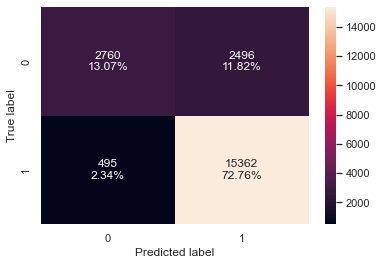

In [79]:
confusion_matrix_sklearn(svclassifier, X_train, y_train)

In [80]:
svclassifier_model_train_perf = model_performance_classification_sklearn(
    svclassifier, X_train, y_train
)
svclassifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.858334,0.968784,0.860231,0.911286


### Observation
- The SVM performs pretty good on the training dataset with an accuracy of 85%

### Testing

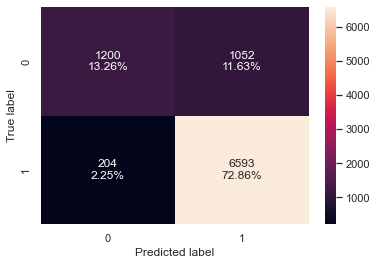

In [81]:
confusion_matrix_sklearn(svclassifier, X_test, y_test)

In [82]:
svclassifier_model_test_perf = model_performance_classification_sklearn(
    svclassifier, X_test, y_test
)
svclassifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.8612,0.969987,0.862394,0.913031


### Observation
- The testing dataset performs almost similar to the training dataset.
- Lets try to tune the model and see the scores

### Hyperparameter Tuning

In [87]:
# Choose the type of classifier.
svc_estimator = svm.SVC()

# Grid of parameters to choose from
parameters = {
    "C":[1, 10, 100, 200, 500],
    "gamma": [1, 0.1, 0.01, 0.001, 0.0001],
    "kernel": ['rbf'],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(svc_estimator, parameters,refit = True, verbose = 3, scoring=acc_scorer, cv=5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
svc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
svc_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.860 total time= 1.5min
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.865 total time= 1.5min
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.861 total time= 1.5min
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.860 total time= 1.4min
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.861 total time= 1.3min
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.894 total time=  40.7s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.898 total time=  32.8s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.896 total time=  32.1s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.889 total time=  35.5s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.893 total time=  41.0s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.906 total time=  12.5s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf

SVC(C=200, gamma=0.001)

In [83]:
svc_tuned=svm.SVC(C=200, gamma=0.001)
svc_tuned.fit(X_train, y_train)

SVC(C=200, gamma=0.001)

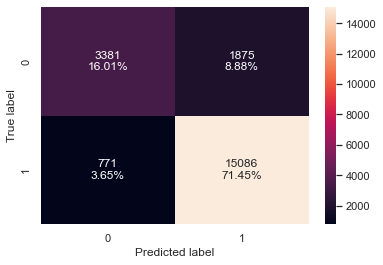

In [84]:
confusion_matrix_sklearn(svc_tuned, X_train, y_train)


In [85]:
svclassifier_tuned_model_train_perf = model_performance_classification_sklearn(
    svc_tuned, X_train, y_train
)
svclassifier_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.874674,0.951378,0.889452,0.919374


### Observation
- The accuracy increases after tuning from 85% to 87%.
- The recall decreases from 96% to 95%.

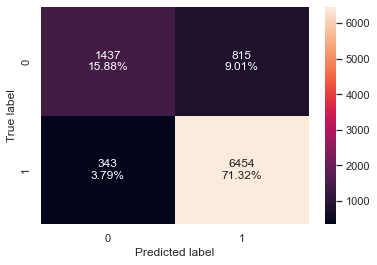

In [86]:
confusion_matrix_sklearn(svc_tuned, X_test, y_test)

In [87]:
svclassifier_tuned_model_test_perf = model_performance_classification_sklearn(
    svc_tuned, X_test, y_test
)
svclassifier_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.87203,0.949537,0.88788,0.917674


### Observation
- The testing data performs very similar to the trainiing dataset

### Conclusion

##### Comparing all the models

In [88]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        svclassifier_model_train_perf.T,
        svclassifier_tuned_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Descision Tree",
    "Random Forest",
    "Tuned Random Forest",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "SVM Classifier",
    "Tuned SVM Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Descision Tree,Random Forest,Tuned Random Forest,Bagging Classifier,Tuned Bagging Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,SVM Classifier,Tuned SVM Classifier
Accuracy,0.979160,0.716573,0.977407,0.857576,0.971060,0.966324,0.862454,0.875716,0.858334,0.874674
Recall,0.980450,0.658510,0.975847,0.958189,0.981396,0.988270,0.945576,0.946018,0.968784,0.951378
Precision,0.991708,0.948324,0.993962,0.866347,0.980098,0.967585,0.880188,0.894567,0.860231,0.889452
F1,0.986047,0.777282,0.984821,0.909957,0.980747,0.977818,0.911711,0.919573,0.911286,0.919374


In [89]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        dtree_estimator_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        svclassifier_model_test_perf.T,
        svclassifier_tuned_model_test_perf.T,
        
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Descision Tree",
    "Random Forest",
    "Tuned Random Forest",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "SVM Classifier",
    "Tuned SVM Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Tuned Descision Tree,Random Forest,Tuned Random Forest,Bagging Classifier,Tuned Bagging Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,SVM Classifier,Tuned SVM Classifier
Accuracy,0.810808,0.717759,0.847055,0.858658,0.834567,0.859653,0.869599,0.872583,0.861200,0.872030
Recall,0.863911,0.656760,0.910990,0.960424,0.890246,0.931587,0.949978,0.945564,0.969987,0.949537
Precision,0.881814,0.952828,0.888251,0.866012,0.889591,0.887208,0.884884,0.891401,0.862394,0.887880
F1,0.872771,0.777565,0.899477,0.910778,0.889918,0.908856,0.916276,0.917684,0.913031,0.917674


### Observation
- Almost all the models perform slightly better after being tuned.
- Gradient Boosting Tuned and SVM Tuned give the same scores with 87% Accuracy and 94% recall.
- We will choose Random-Forest Tuned as the final model as it gives us a better recall score of 96% and the accuracy of almost 86%.

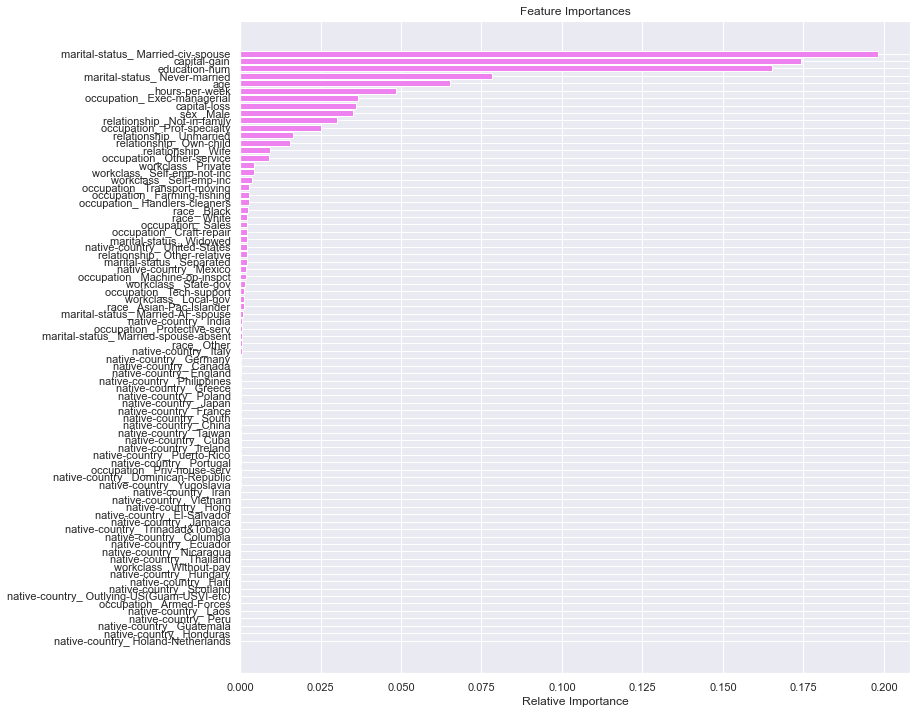

In [90]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

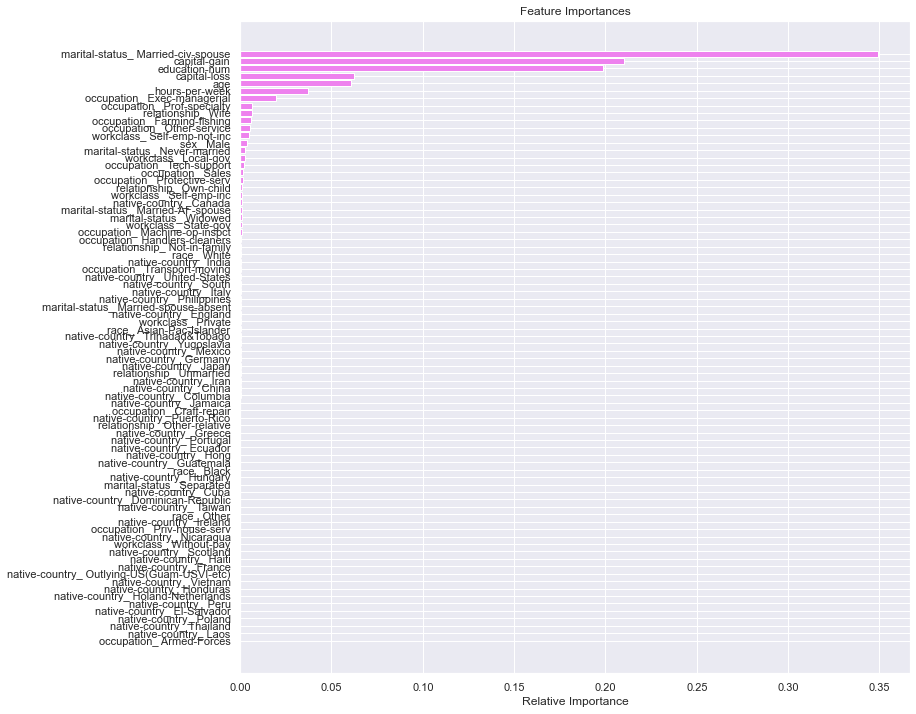

In [91]:
feature_names1 = X_train.columns
importances1 = gbc_tuned.feature_importances_
indices1 = np.argsort(importances1)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices1)), importances1[indices1], color="violet", align="center")
plt.yticks(range(len(indices1)), [feature_names1[i] for i in indices1])
plt.xlabel("Relative Importance")
plt.show()

### Observation
- The most important feature is martial-status to having a salary of >50K
- The second most important feature is capital-gain.
- The third most important feature is education-num.

### Now that we have found the important features of the models from Random Forest and Gradient Boosting. Lets try to see if only selecting the top 15 features we can get a better result on the top 3 models such as Random Forest and Gradient Boosting.

In [97]:
print(type(importances))
print(type(rf_tuned))
print(indices)
x1 = [feature_names[i] for i in indices[-15:]]
print(x1)

print(type(importances1))
print(type(gbc_tuned))
print(indices1)
x2 = [feature_names1[i] for i in indices1[-15:]]
print(x2)

<class 'numpy.ndarray'>
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
[53 54 51 67 63 17 66 72 52 56 10 75 65 45 42 76 61 46 55 78 58 79 44 24
 70 71 59 43 74 41 73 48 62 69 50 68 47 40 49 60 37 13 26 57 11 35  5 28
  9 22 64 15 31 77 16 18 27 38 36 21 20 29  7  8  6 23 34 32 33 25 30 39
  3 19  4  0 14  1  2 12]
['occupation_ Other-service', 'relationship_ Wife', 'relationship_ Own-child', 'relationship_ Unmarried', 'occupation_ Prof-specialty', 'relationship_ Not-in-family', 'sex_ Male', 'capital-loss', 'occupation_ Exec-managerial', 'hours-per-week', 'age', 'marital-status_ Never-married', 'education-num', 'capital-gain', 'marital-status_ Married-civ-spouse']
<class 'numpy.ndarray'>
<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
[17 63 75 69 46 67 53 54 78 66 48 52 72 10 65 24 59 37 74 44 43 15 56 36
 51 55 45 70 50 31 71 18 61 42 41 58 33 62 49 64 79 76 35  6 47 13 68 60
 73 77 29 57 38 30 21 22  9 16 11 40  7 32 26 27 28  5 14 39  8 23 20 34
 25 19  4  0  3 

In [98]:
print(type(x1[0]))
print(x1)

<class 'str'>
['occupation_ Other-service', 'relationship_ Wife', 'relationship_ Own-child', 'relationship_ Unmarried', 'occupation_ Prof-specialty', 'relationship_ Not-in-family', 'sex_ Male', 'capital-loss', 'occupation_ Exec-managerial', 'hours-per-week', 'age', 'marital-status_ Never-married', 'education-num', 'capital-gain', 'marital-status_ Married-civ-spouse']


In [99]:
dummy_names = X
print(dummy_names.shape)
for name in dummy_names.columns:
    if name in x1:
        print(name)
        continue
    else:
        print(name + " droped")
        dummy_names = dummy_names.drop(name,axis = 1)

dummy_names2 = X
print(dummy_names2.shape)
for name in dummy_names2.columns:
    if name in x2:
        print(name)
        continue
    else:
        print(name + " droped")
        dummy_names2 = dummy_names2.drop(name,axis = 1)

(30162, 80)
age
education-num
capital-gain
capital-loss
hours-per-week
workclass_ Local-gov droped
workclass_ Private droped
workclass_ Self-emp-inc droped
workclass_ Self-emp-not-inc droped
workclass_ State-gov droped
workclass_ Without-pay droped
marital-status_ Married-AF-spouse droped
marital-status_ Married-civ-spouse
marital-status_ Married-spouse-absent droped
marital-status_ Never-married
marital-status_ Separated droped
marital-status_ Widowed droped
occupation_ Armed-Forces droped
occupation_ Craft-repair droped
occupation_ Exec-managerial
occupation_ Farming-fishing droped
occupation_ Handlers-cleaners droped
occupation_ Machine-op-inspct droped
occupation_ Other-service
occupation_ Priv-house-serv droped
occupation_ Prof-specialty
occupation_ Protective-serv droped
occupation_ Sales droped
occupation_ Tech-support droped
occupation_ Transport-moving droped
relationship_ Not-in-family
relationship_ Other-relative droped
relationship_ Own-child
relationship_ Unmarried
relatio

In [100]:
print(dummy_names.shape)
print(dummy_names2.shape)


(30162, 15)
(30162, 15)


### Creating 2 different datasets; alpha and beta where alpha contains the top 15 features for the Random Forest and the beta contains the top 15 features for the Gradient Boost

In [101]:
# Splitting data in train and test sets
alpha = dummy_names
alpha_train, alpha_test, y_train, y_test = train_test_split(
    alpha, Y, test_size=0.30, random_state=1, stratify=Y
)

beta = dummy_names2
beta_train, beta_test, y_train, y_test = train_test_split(
    beta, Y, test_size=0.30, random_state=1, stratify=Y
)

### SVM Classifier for the top 15 features using Alpha dataset

In [107]:
svc_tunedalpha=svm.SVC(C=200, gamma=0.001)
svc_tunedalpha.fit(alpha_train, y_train)

SVC(C=200, gamma=0.001)

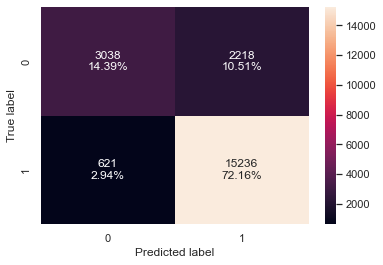

In [108]:
confusion_matrix_sklearn(svc_tunedalpha, alpha_train, y_train)


In [109]:
svclassifier_tunedalpha_model_train_perf = model_performance_classification_sklearn(
    svc_tunedalpha, alpha_train, y_train
)
svclassifier_tunedalpha_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.865533,0.960837,0.872923,0.914773


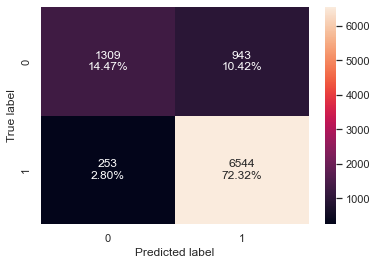

In [110]:
confusion_matrix_sklearn(svc_tunedalpha, alpha_test, y_test)

In [111]:
svclassifier_tunedalpha_model_test_perf = model_performance_classification_sklearn(
    svc_tunedalpha, alpha_test, y_test
)
svclassifier_tunedalpha_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.867831,0.962778,0.874048,0.91627


### SVM Classifier for the top 15 features using Beta dataset

In [143]:
svc_tunedbeta=svm.SVC(gamma=0.001)
svc_tunedbeta.fit(beta_train, y_train)

SVC(gamma=0.001)

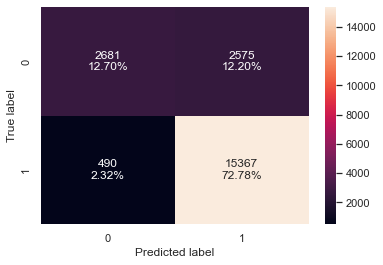

In [144]:
confusion_matrix_sklearn(svc_tunedbeta, beta_train, y_train)


In [145]:
svclassifier_tunedbeta_model_train_perf = model_performance_classification_sklearn(
    svc_tunedbeta, beta_train, y_train
)
svclassifier_tunedbeta_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.854829,0.969099,0.856482,0.909317


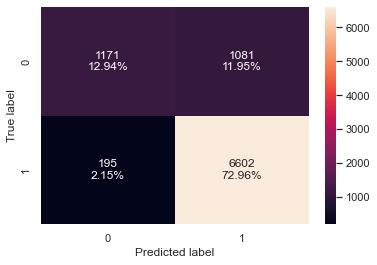

In [146]:
confusion_matrix_sklearn(svc_tunedbeta, beta_test, y_test)

In [147]:
svclassifier_tunedbeta_model_test_perf = model_performance_classification_sklearn(
    svc_tunedbeta, beta_test, y_test
)
svclassifier_tunedbeta_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.85899,0.971311,0.8593,0.911878


### Gradient Boost Classifier for the top 15 features using Alpha dataset

In [117]:
gbc_tunedalpha=GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=300, random_state=1,
                           subsample=1)
gbc_tunedalpha.fit(alpha_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=300, random_state=1,
                           subsample=1)

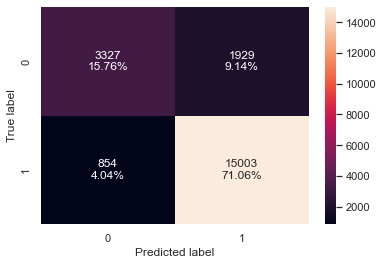

In [118]:
confusion_matrix_sklearn(gbc_tunedalpha, alpha_train, y_train)


In [119]:
gbc_tunedalpha_model_train_perf = model_performance_classification_sklearn(
    gbc_tunedalpha, alpha_train, y_train
)
gbc_tunedalpha_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.868185,0.946144,0.886074,0.915124


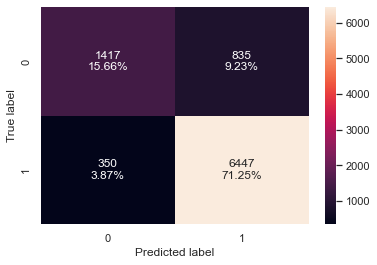

In [120]:
confusion_matrix_sklearn(gbc_tunedalpha, alpha_test, y_test)


In [121]:
gbc_tunedalpha_model_test_perf = model_performance_classification_sklearn(
    gbc_tunedalpha, alpha_test, y_test
)
gbc_tunedalpha_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.869046,0.948507,0.885334,0.915832


### Gradient Boost Classifier for the top 15 features using Beta dataset

In [122]:
gbc_tunedbeta=GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=300, random_state=1,
                           subsample=1)
gbc_tunedbeta.fit(beta_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=300, random_state=1,
                           subsample=1)

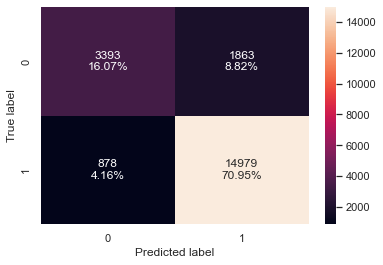

In [123]:
confusion_matrix_sklearn(gbc_tunedbeta, beta_train, y_train)


In [125]:
gbc_tunedbeta_model_train_perf = model_performance_classification_sklearn(
    gbc_tunedbeta, beta_train, y_train
)
gbc_tunedbeta_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.870175,0.94463,0.889384,0.916175


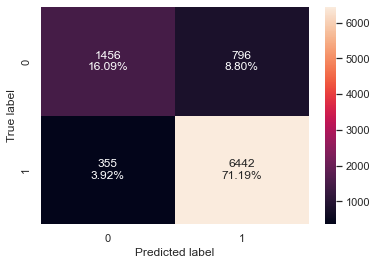

In [126]:
confusion_matrix_sklearn(gbc_tunedbeta, beta_test, y_test)


In [127]:
gbc_tunedbeta_model_test_perf = model_performance_classification_sklearn(
    gbc_tunedbeta, beta_test, y_test
)
gbc_tunedbeta_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.872804,0.947771,0.890025,0.917991


### Random Forest Classifier for the top 15 features using Alpha dataset

In [129]:
rf_tunedalpha = RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=5,
                       n_estimators=30, oob_score=True, random_state=1)
rf_tunedalpha.fit(alpha_train,y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=5,
                       n_estimators=30, oob_score=True, random_state=1)

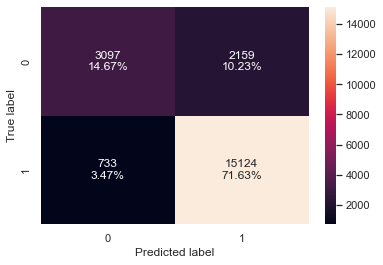

In [130]:
confusion_matrix_sklearn(rf_tunedalpha, alpha_train, y_train)


In [131]:
rf_tunedalpha_model_train_perf = model_performance_classification_sklearn(
    rf_tunedalpha, alpha_train, y_train
)
rf_tunedalpha_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.863023,0.953774,0.87508,0.912734


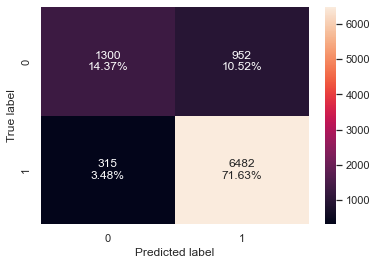

In [132]:
confusion_matrix_sklearn(rf_tunedalpha, alpha_test, y_test)


In [133]:
rf_tunedalpha_model_test_perf = model_performance_classification_sklearn(
    rf_tunedalpha, alpha_test, y_test
)
rf_tunedalpha_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.859985,0.953656,0.87194,0.910969


### Random Forest Classifier for the top 15 features using Beta dataset

In [134]:
rf_tunedbeta = RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=5,
                       n_estimators=30, oob_score=True, random_state=1)
rf_tunedbeta.fit(beta_train,y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=5,
                       n_estimators=30, oob_score=True, random_state=1)

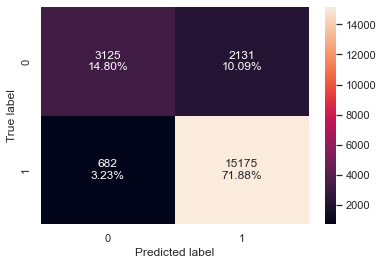

In [135]:
confusion_matrix_sklearn(rf_tunedbeta, beta_train, y_train)


In [136]:
rf_tunedbeta_model_train_perf = model_performance_classification_sklearn(
    rf_tunedbeta, beta_train, y_train
)
rf_tunedbeta_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.866765,0.956991,0.876864,0.915177


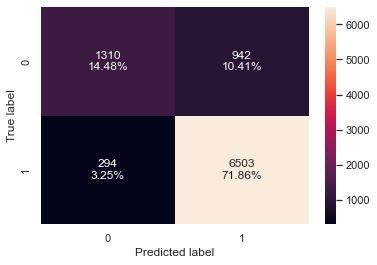

In [137]:
confusion_matrix_sklearn(rf_tunedbeta, beta_test, y_test)


In [138]:
rf_tunedbeta_model_test_perf = model_performance_classification_sklearn(
    rf_tunedbeta, beta_test, y_test
)
rf_tunedbeta_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.86341,0.956746,0.873472,0.913214


### Compare all the models

In [148]:
# training performance comparison

models_trainnew_comp_df = pd.concat(
    [
        rf_tuned_model_train_perf.T,
        rf_tunedalpha_model_train_perf.T,
        rf_tunedbeta_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        gbc_tunedalpha_model_train_perf.T,
        gbc_tunedbeta_model_train_perf.T,
        svclassifier_model_train_perf.T,
        svclassifier_tunedalpha_model_train_perf.T,
        svclassifier_tunedbeta_model_train_perf.T,
        
    ],
    axis=1,
)
models_trainnew_comp_df.columns = [
    "Tuned Random Forest",
    "Tuned Random Forest Alpha",
    "Tuned Random Forest Beta",
    "Tuned Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier Alpha",
    "Tuned Gradient Boost Classifier Beta",
    "SVM Classifier",
    "Tuned SVM Classifier Alpha",
    "Tuned SVM Classifier Beta",
]
print("Training performance comparison:")
models_trainnew_comp_df

Training performance comparison:


,Tuned Random Forest,Tuned Random Forest Alpha,Tuned Random Forest Beta,Tuned Gradient Boost Classifier,Tuned Gradient Boost Classifier Alpha,Tuned Gradient Boost Classifier Beta,SVM Classifier,Tuned SVM Classifier Alpha,Tuned SVM Classifier Beta
Accuracy,0.857576,0.863023,0.866765,0.875716,0.868185,0.870175,0.858334,0.865533,0.854829
Recall,0.958189,0.953774,0.956991,0.946018,0.946144,0.944630,0.968784,0.960837,0.969099
Precision,0.866347,0.875080,0.876864,0.894567,0.886074,0.889384,0.860231,0.872923,0.856482
F1,0.909957,0.912734,0.915177,0.919573,0.915124,0.916175,0.911286,0.914773,0.909317


In [149]:
# testing performance comparison

models_testnew_comp_df = pd.concat(
    [
        rf_tuned_model_test_perf.T,
        rf_tunedalpha_model_test_perf.T,
        rf_tunedbeta_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        gbc_tunedalpha_model_test_perf.T,
        gbc_tunedbeta_model_test_perf.T,
        svclassifier_model_test_perf.T,
        svclassifier_tunedalpha_model_test_perf.T,
        svclassifier_tunedbeta_model_test_perf.T,
        
    ],
    axis=1,
)
models_testnew_comp_df.columns = [
    "Tuned Random Forest",
    "Tuned Random Forest Alpha",
    "Tuned Random Forest Beta",
    "Tuned Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier Alpha",
    "Tuned Gradient Boost Classifier Beta",
    "SVM Classifier",
    "Tuned SVM Classifier Alpha",
    "Tuned SVM Classifier Beta",
]
print("Testing performance comparison:")
models_testnew_comp_df

Testing performance comparison:


,Tuned Random Forest,Tuned Random Forest Alpha,Tuned Random Forest Beta,Tuned Gradient Boost Classifier,Tuned Gradient Boost Classifier Alpha,Tuned Gradient Boost Classifier Beta,SVM Classifier,Tuned SVM Classifier Alpha,Tuned SVM Classifier Beta
Accuracy,0.858658,0.859985,0.863410,0.872583,0.869046,0.872804,0.861200,0.867831,0.858990
Recall,0.960424,0.953656,0.956746,0.945564,0.948507,0.947771,0.969987,0.962778,0.971311
Precision,0.866012,0.871940,0.873472,0.891401,0.885334,0.890025,0.862394,0.874048,0.859300
F1,0.910778,0.910969,0.913214,0.917684,0.915832,0.917991,0.913031,0.916270,0.911878


### Observation
- Almost all the models seem to perform the same on both the alpha and beta dataset.
- SVM on beta gives an slightly better recall value with about 97% which seems good. Which is why we will stick with SVM for our classifier

# Insights and Recommendation
- The most important feature to have a salary >50K is martial-status which means the if you are married, you have a high chance of getting a salary over 50K.
- We could use more classifying algorithms to get a better understanding.
- The data could be more extensive to help predict the right salary.
- The Best classifier would be SVM Classifier.
- We could use Random Forest classifiier/Gradient Boosting to predict the salaries as they give almost the same result and they take less computational power.